In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


In [2]:
# importing the dataset

dataset = pd.read_csv("Big_mart.csv")

X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 11].values

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# Perform data cleaning on the dataset

# Check for missing values

dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

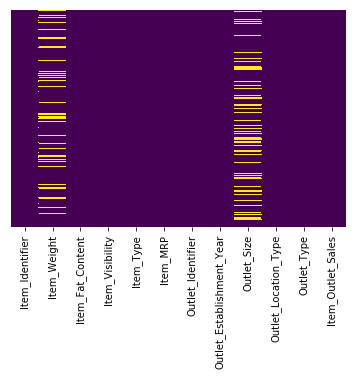

In [8]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [10]:
dataset.describe(include ='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Preprocessing

In [12]:
avg_weight = dataset.pivot_table(index ='Item_Identifier',values = 'Item_Weight')
avg_weight.describe()

,Item_Weight
count,1555.000000
mean,12.808553
std,4.652088
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


In [15]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    if pd.isnull(Weight):
        return avg_weight['Item_Weight'][avg_weight.index == Identifier]
    else:
        return Weight

dataset['Item_Weight'] = dataset[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)

dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Manually setting 4 values based on their avg weight of item type

In [16]:
# 1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat',
'low fat': 'Low Fat',
'reg': 'Regular'})
print('Modified Categories:')
print(dataset['Item_Fat_Content'].value_counts())

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [17]:
# 2. Item_weight: this feature is with some missing values.

from sklearn.preprocessing import Imputer
Item_Weight_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
Item_Weight_imputer = Item_Weight_imputer.fit(dataset.iloc[:, [1]])
dataset.iloc[:, [1]] = Item_Weight_imputer.transform(dataset.iloc[:, [1]])
print (dataset.iloc[:, [1]])

      Item_Weight
0           9.300
1           5.920
2          17.500
3          19.200
4           8.930
5          10.395
6          13.650
7          19.000
8          16.200
9          19.200
10         11.800
11         18.500
12         15.100
13         17.600
14         16.350
15          9.000
16         11.800
17          9.000
18          8.260
19         13.350
20         18.850
21          8.315
22         14.600
23         15.500
24         13.850
25         13.000
26          7.645
27         11.650
28          5.925
29         14.500
...           ...
8493        7.420
8494       15.200
8495        9.695
8496        7.420
8497       13.650
8498       15.350
8499       11.600
8500       20.350
8501        5.340
8502        8.420
8503       20.500
8504        8.895
8505       10.500
8506       17.250
8507        5.880
8508       11.350
8509        8.100
8510       13.800
8511       17.500
8512       20.700
8513       12.000
8514       15.000
8515       20.700
8516      

In [18]:
# 3. Outlet_Type:this feature is with some missing values .

dataset.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
dataset['Outlet_Type'] = dataset['Outlet_Type'].fillna('Supermarket Type1')

In [20]:
#Outlet_Size:this feature is with some missing values .
dataset.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna('Medium')

In [22]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


# Feature Engineering

In this section, we will make our data ready for analysis by modifying/creating new variables

In [23]:
dataset.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


The above shows significant difference between Supermarket Type2 and Type3, therefore, we will leave them separate as it is.

In [24]:
visibility_item_avg = dataset.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [25]:
def impute_visibility_mean(cols):
    
    visibility = cols[0]
    item = cols[1]
    
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [26]:
print ('Original #zeros: %d'%sum(dataset['Item_Visibility'] == 0))
dataset['Item_Visibility'] = dataset[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(dataset['Item_Visibility'] == 0))

Original #zeros: 526
Final #zeros: 0


In [27]:
dataset['Item_Visibility_MeanRatio'] = dataset.apply(lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0],axis=1).astype(float)

In [28]:
dataset['Item_Visibility_MeanRatio'].describe()

count    8523.000000
mean        1.061715
std         0.237149
min         0.678833
25%         0.903570
50%         1.000000
75%         1.055863
max         2.729420
Name: Item_Visibility_MeanRatio, dtype: float64

# Numerical and Categorical Variables

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Outlet'] = le.fit_transform(dataset['Outlet_Identifier'])
cat_var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in cat_var_mod:
    
    dataset[i] = le.fit_transform(dataset[i])


In [30]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,0.922960,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,1.003057,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,0.831990,9
3,FDX07,19.20,1,0.015274,6,182.0950,OUT010,1998,1,2,0,732.3800,1.000000,0
4,NCD19,8.93,0,0.008082,9,53.8614,OUT013,1987,0,2,1,994.7052,1.000000,1


# EDA

In [31]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,0.922960,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,1.003057,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,0.831990,9
3,FDX07,19.20,1,0.015274,6,182.0950,OUT010,1998,1,2,0,732.3800,1.000000,0
4,NCD19,8.93,0,0.008082,9,53.8614,OUT013,1987,0,2,1,994.7052,1.000000,1


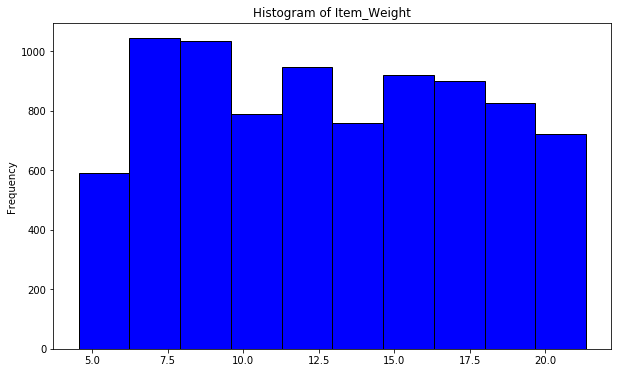

In [32]:
dataset.Item_Weight.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')


From this we can conclude that maximum item size lies in the range of 12 to 12.7

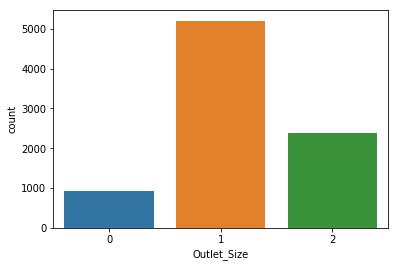

In [33]:
sns.countplot(dataset['Outlet_Size'])

There were more Medium sized outlets

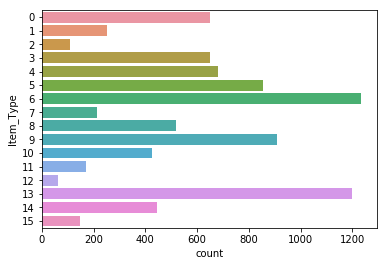

In [34]:
sns.countplot(y=dataset['Item_Type'])

More Fruits and vegetables were sold with second highest being snack foods

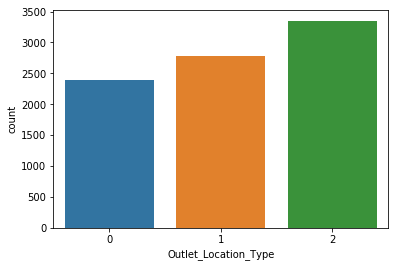

In [35]:
sns.countplot(dataset['Outlet_Location_Type'])

Tier 3 had more sale and least being tier 1

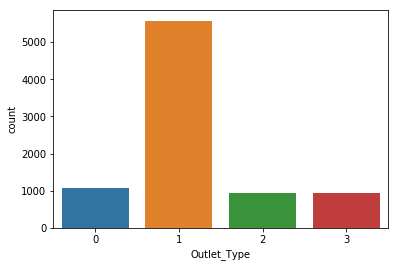

In [36]:
sns.countplot(dataset['Outlet_Type'])

Supermarket type 1 had the most sale

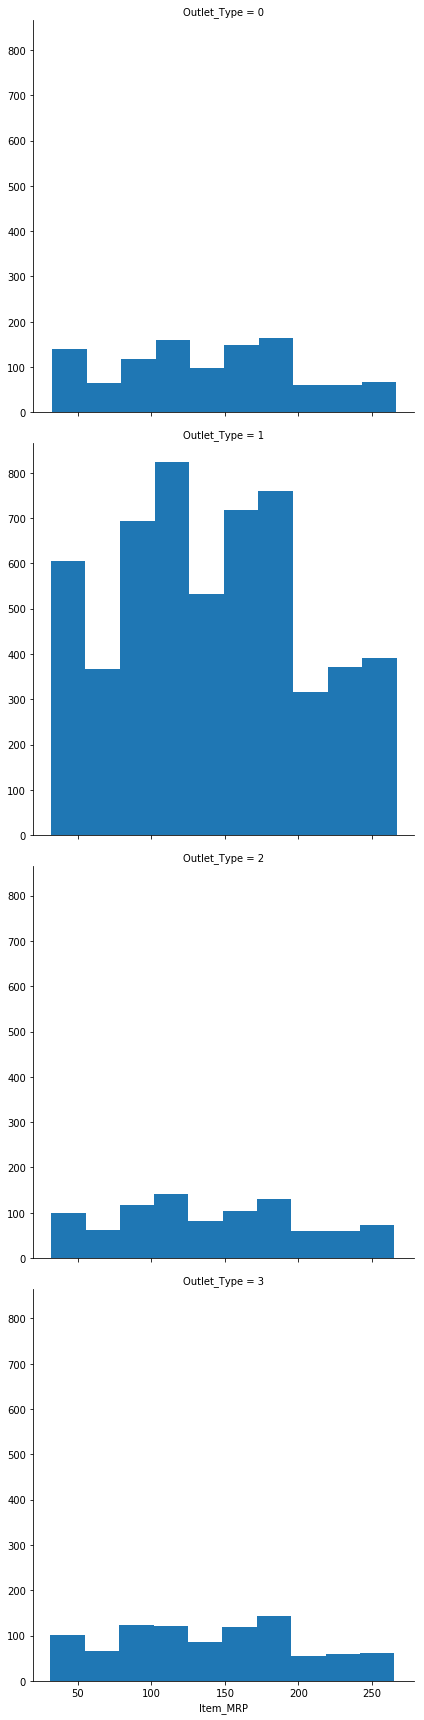

In [37]:
sns.FacetGrid(data = dataset,row = 'Outlet_Type',size = 6).map(plt.hist,'Item_MRP')

There were more goods sold in mrp range 100-120 in supermarket type 1

Fat Content had almost no effect on item sales